# Trabajo de análisis de imágenes
### Autores: Laura Lucendo y Guillermo Valle

Explicación buena del trabajo

## 1. Descarga de imágenes de Google

El dataset con el que se comenzó a trabajar es un dataset de Kaggle que se encuentra en el siguiente [link](https://www.kaggle.com/dansbecker/5-celebrity-faces-dataset), y contiene las imágenes de 5 famosos. Puesto a que se disponía de un número reducido de imágenes, se ha creado un script de descarga de imágenes de Google para poder ampliar nuestro dataset para el posterior entrenamiento de la red.
Este módulo tiene el código necesario para la descarga de imágenes de Google según las indicaciones que se le pasen a la función 'get_new_images()'. En caso de querer obtener más información se puede ver el script **'google_images.py'** del proyecto.
Para poder ejecutar este módulo es necesario tener el fichero chromedriver.exe descargado o instalado. En el siguiente [link](https://www.notion.so/Chuleta-6-Chromedriver-a73835df5e304c3cbd73b6d8cc2cd40c) se tiene una guía de como instalar chromedriver. Si el ordenador es windows, el código está preparado para tener el fichero 'chromedriver.exe' en la carpeta del proyecto.

In [1]:
# Carga de la clase y creación de la instancia
from google_images import GOOGLE_IMAGES
google_img = GOOGLE_IMAGES()

Instancia de la clase GOOGLE_IMAGES creada


In [4]:
# Descarga de las imágenes de los famosos que se quieran tener
google_img.get_new_images(search_keyword = ['Messi', 'Beyonce','Shakira','Sara Carbonero','Miley Cyrus'], visible= True)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


Cuando se han descargado las imágenes se realiza una revisión rápida y se pasan a las carpetas de las rutas 'archive/data/train' y 'archive/data/val' para tener en el dataset otra persona pública más. Este proceso se puede hacer manual o se puede ejecutar el siguiente comando que llama a la función 'move_new_images()'. Este método permite mover las imágenes que se acaban de descargar a la carpeta de entrenamiento y validación. Y permite poder decidir cuantas imágenes queremos que vayan a la carpeta de validación (si tenemos 8 imágenes de cada keyword del famoso, se podrían pasar 2 a la carpeta de validación con el parámetro 'val_num').

In [ ]:
# Descarga de las imágenes de los famosos que se quieran tener
google_img.move_new_images()

## 2. Análisis exploratorio de los datos

En este apartado se realiza un pequeño análisis exploratorio de los datos que se tienen para entrenar los modelos. Se disponen de dos modelos preentrenados que se han guardado en la ruta 'archive/keras_pretrained_models/'.

In [1]:
# Directorio de trabajo
cwd = os.getcwd()

# Directorios de las imágenes de entrenamiento y validacion
train_data_dir=os.path.join(cwd, 'archive/data/train')
validation_data_dir=os.path.join(cwd,'archive/data/val')

In [2]:
# Conteo del número de imágenes disponibles para entrenamiento y validación
totalFilesTrain = 0
totalFilesVal = 0
for root, dirs, files in os.walk(train_data_dir):
    for name in files:
        (base, ext) = os.path.splitext(name) # split base and extension
        if ext in ('.jpg', '.png'):          # check the extension
            totalFilesTrain += 1
for root, dirs, files in os.walk(validation_data_dir):
    for name in files:
        (base, ext) = os.path.splitext(name) # split base and extension
        if ext in ('.jpg', '.png'):          # check the extension
            totalFilesVal += 1
print('Se disponen de {} imágenes para entrenamiento'.format(totalFilesTrain))
print('Se disponen de {} imágenes para validación'.format(totalFilesVal))

Se disponen de 93 imágenes para entrenamiento
Se disponen de 25 imágenes para validación


Puesto que queremos que nuestros modelos tengan suficientes imágenes para poder aprender de los datos y realizar una buena clasificación se ha realizado Data Augmentation a partir de las imágenes ya existentes para aumentar el tamaño del dataset.

## 3. Data Augmentation

El código desarrollado para la generación de imágenes se encuentra en la clase CNN del script **'cnn.py'**. En las siguientes líneas se muestra como se ha generado nuevas imágenes y se imprime por pantalla un collage de 6 ejemplos de imágenes generadas a partir del dataset. La función 'train(test_data_aug = True)' devuelve un batch con el que generamos el collage para comprobar como se realiza el data augmentation.

In [2]:
# Carga de la clase y creación de la instancia
from cnn import CNN
cnn = CNN()

Using TensorFlow backend.
Instancia de la clase DATA_AUGMENTATION creada


In [4]:
# Generación de las imágenes
batch = cnn.train(test_data_aug = True)

Found 93 images belonging to 5 classes.


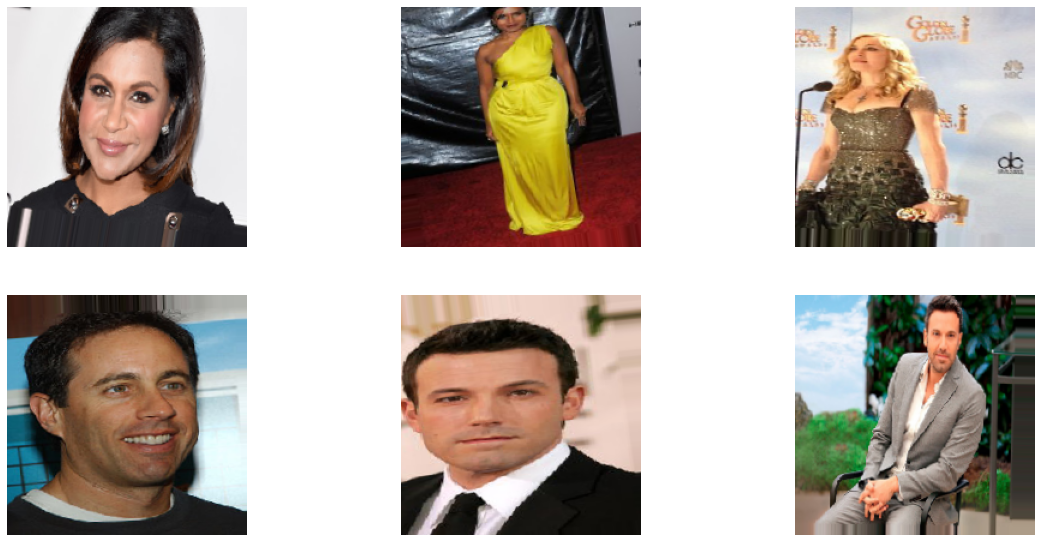

In [5]:
import matplotlib.pyplot as plt
# Collage de las imágenes generadas
fig = plt.figure(figsize=(20, 15))
for i in range(6):
    #batch=next(train_generator) # returns the next batch of images and labels 
    # define subplot
    fig.add_subplot(330 + 1 + i)
    # generate batch of images
    # convert to unsigned integers for viewing
    image = batch[0][i]
    plt.imshow(image)
    # plot raw pixel data
    #plt.imshow(image)
    plt.axis('off')
    # show the figure
plt.show()

## 4. CNN preentrenadas

En este apartado se hace uso de una red entrenada llamada 'vgg16CNNtl' y que tiene la función 'vgg16CNNtl()' en la clase CNN. En la llamada al método train se realiza el entrenamiento del modelo. Si se quiere una mayor información de lo que hace cada función, en el script **'cnn.py'** se encuentra todo el código comentado.

#### Dropout 0.5

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/50
3/3 [==============================] - 57s 19s/step - loss: 2.1857 - accuracy: 0.1270 - val_loss: 1.6245 - val_accuracy: 0.2000
Epoch 2/50
3/3 [==============================] - 71s 24s/step - loss: 1.9068 - accuracy: 0.2000 - val_loss: 1.6071 - val_accuracy: 0.2800
Epoch 3/50
3/3 [==============================] - 37s 12s/step - loss: 1.7976 - accuracy: 0.1944 - val_loss: 1.6933 - val_accuracy: 0.2000
Epoch 4/50
3/3 [==============================] - 71s 24s/step - loss: 1.7002 - accuracy: 0.3667 - val_loss: 1.6039 - val_accuracy: 0.2000
Epoch 5/50
3/3 [==============================] - 53s 18s/step - loss: 1.7013 - accuracy: 0.2698 - val_loss: 1.5754 - val_accuracy: 0.2800
Epoch 6/50
3/3 [==============================] - 50s 17s/step - loss: 1.5777 - accuracy: 0.3016 - val_loss: 1.6434 - val_accuracy: 0.2000
Epoch 7/50
3/3 [==============================] - 67s 22s/step - loss: 1.7461 - accura

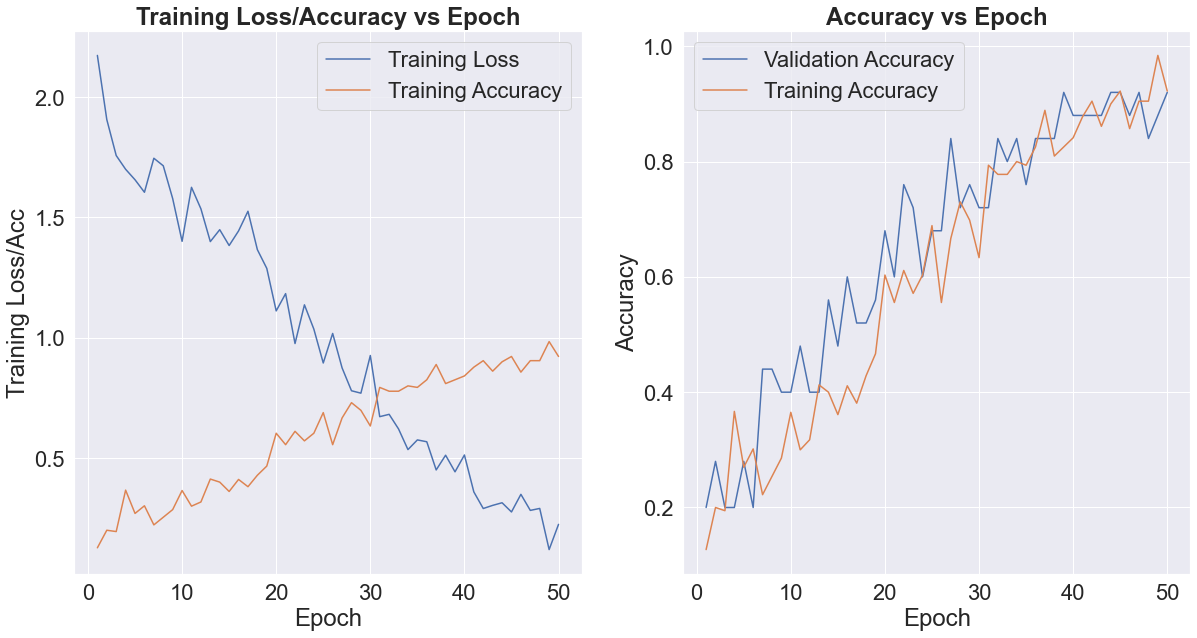

In [6]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.5, epochs = 50, learning_rate = 1e-5, decay = 1e-7)
cnn.save('vgg16CNNtl_dropout05')

In [4]:
from keras.models import load_model
model_1 = load_model('archive/models/vgg16CNNtl_dropout05.h5')

Cuando el entrenamiento ha finalizado, se muestra el resultado de como ha sido el entrenamiento.

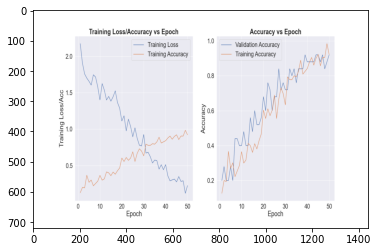

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('archive/models/vgg16CNNtl_dropout05_history.png')
imgplot = plt.imshow(img, aspect='auto')
plt.show()

Se guardan los pesos y puede volver a cargar más tarde para no tener que realizar el entrenamiento.

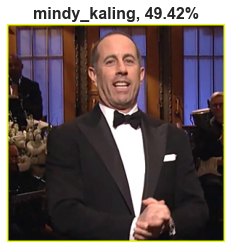

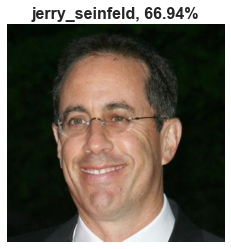

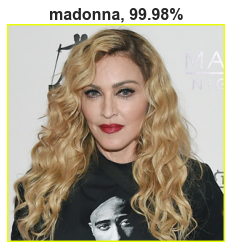

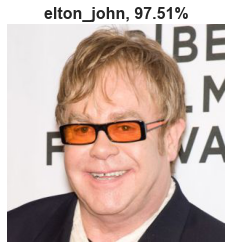

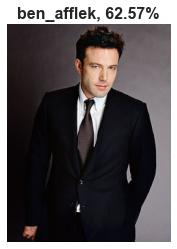

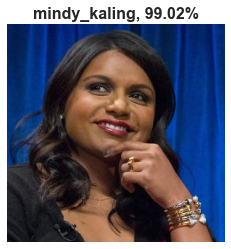

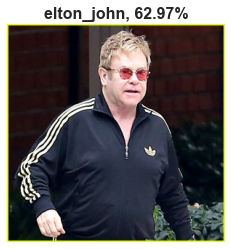

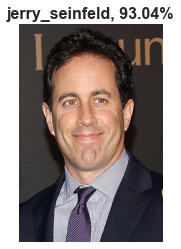

In [9]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_1)

#### Dropout 0.2

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/50
3/3 [==============================] - 45s 15s/step - loss: 1.7896 - accuracy: 0.1746 - val_loss: 1.5736 - val_accuracy: 0.2400
Epoch 2/50
3/3 [==============================] - 45s 15s/step - loss: 1.7619 - accuracy: 0.2857 - val_loss: 1.5056 - val_accuracy: 0.3200
Epoch 3/50
3/3 [==============================] - 45s 15s/step - loss: 1.4533 - accuracy: 0.3651 - val_loss: 1.5074 - val_accuracy: 0.4800
Epoch 4/50
3/3 [==============================] - 61s 20s/step - loss: 1.4657 - accuracy: 0.4000 - val_loss: 1.3254 - val_accuracy: 0.6000
Epoch 5/50
3/3 [==============================] - 45s 15s/step - loss: 1.2272 - accuracy: 0.4921 - val_loss: 1.2365 - val_accuracy: 0.6800
Epoch 6/50
3/3 [==============================] - 46s 15s/step - loss: 1.3493 - accuracy: 0.6032 - val_loss: 1.1935 - val_accuracy: 0.7200
Epoch 7/50
3/3 [==============================] - 62s 21s/step - loss: 0.9948 - accura

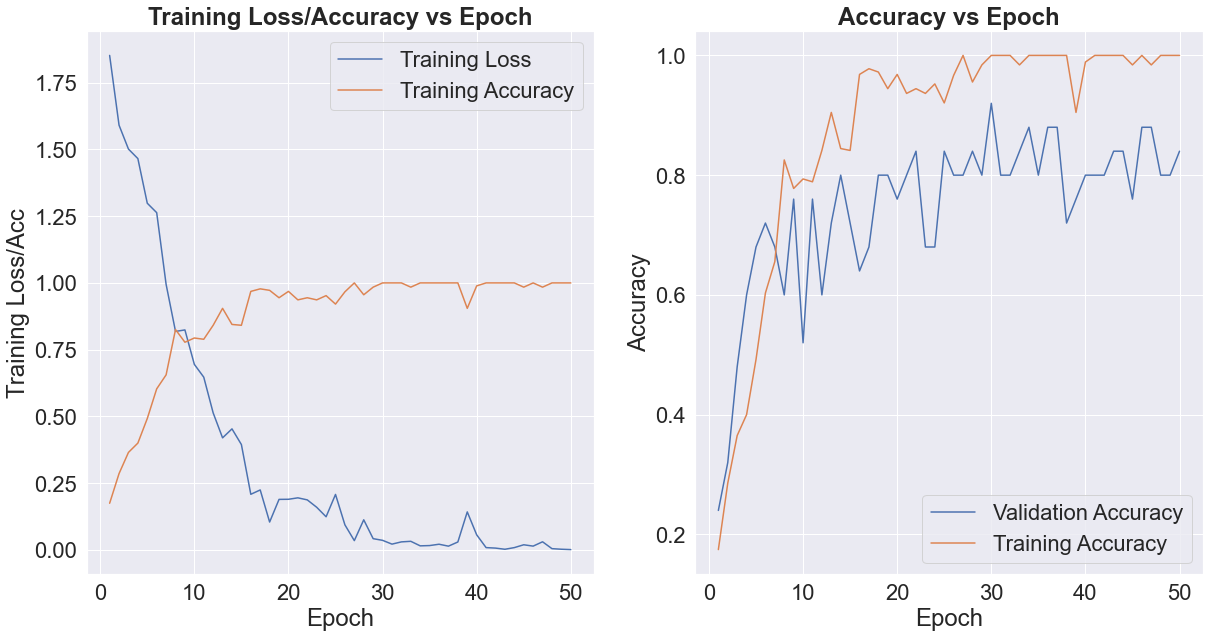

In [10]:
cnn.train(train_data_dir = train_data_dir, validation_data_dir = validation_data_dir, model = 'vgg16CNNtl', dropout = 0.2, epochs = 50, learning_rate = 1e-5, decay = 1e-7)
cnn.save('archive/models/vgg16CNNtl_dropout02')

In [11]:
model_2 = load_model('archive/models/vgg16CNNtl_dropout02.h5')

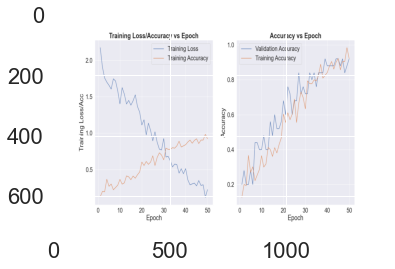

In [12]:
img = mpimg.imread('archive/models/vgg16CNNtl_dropout05_history.png')
imgplot = plt.imshow(img, aspect='auto')
plt.show()

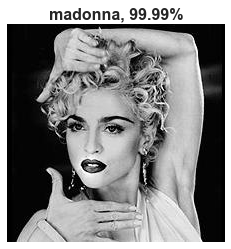

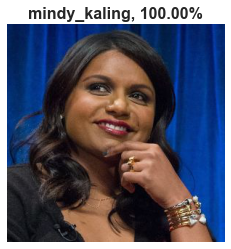

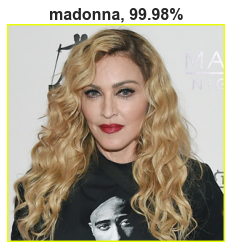

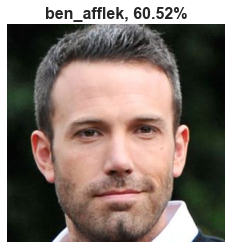

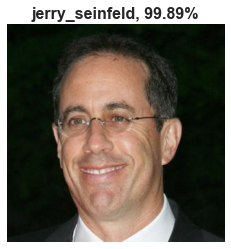

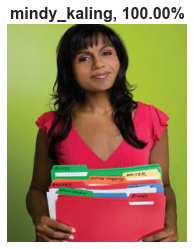

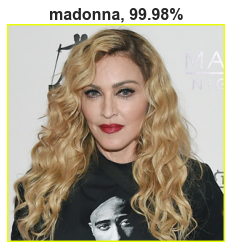

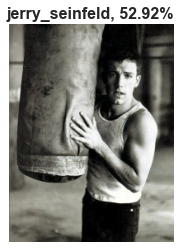

In [13]:
# Se obtiene una muestra de como funciona el modelo.
cnn.test(model = model_2)

## 5. Clustering

In [14]:
# Carga de la clase y creación de la instancia
from clustering import CLUSTERING
clust = CLUSTERING()

Instancia de la clase CLUSTERING creada


In [8]:
# Entrenar facenet
clust.train(base_model = 'facenet_keras.h5')

NameError: name 'clust' is not defined

loaded 14 sample for class: ben_afflek
loaded 17 sample for class: elton_john
loaded 21 sample for class: jerry_seinfeld
loaded 19 sample for class: madonna
loaded 22 sample for class: mindy_kaling
(93, 200, 200, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: elton_john
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: madonna
loaded 5 sample for class: mindy_kaling
(25, 200, 200, 3) (25,)
Loaded Model
[<tf.Tensor 'input_1_3:0' shape=(None, 200, 200, 3) dtype=float32>]
[<tf.Tensor 'sequential_1_2/dense_3/Softmax:0' shape=(None, 5) dtype=float32>]
(93, 5)
(25, 5)
(93, 2)


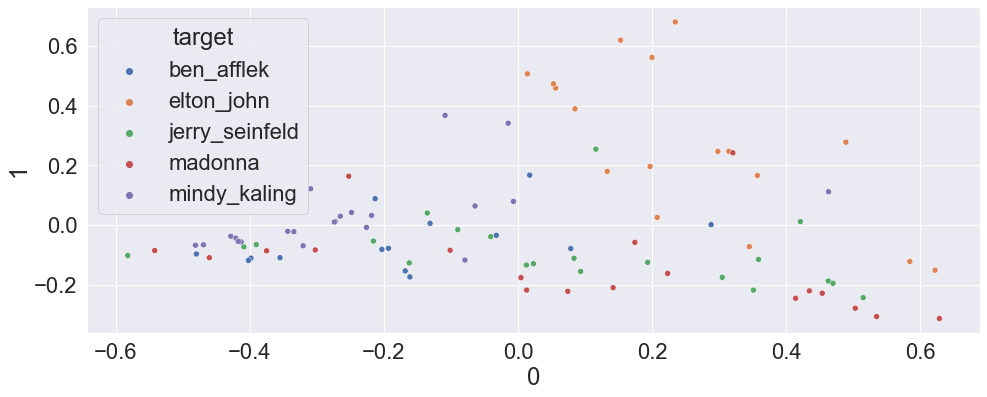

In [16]:
clust.train(base_model = 'vgg16CNNtl_dropout05.h5')

loaded 14 sample for class: ben_afflek
loaded 17 sample for class: elton_john
loaded 21 sample for class: jerry_seinfeld
loaded 19 sample for class: madonna
loaded 22 sample for class: mindy_kaling
(93, 200, 200, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: elton_john
loaded 5 sample for class: jerry_seinfeld
loaded 5 sample for class: madonna
loaded 5 sample for class: mindy_kaling
(25, 200, 200, 3) (25,)
Loaded Model
[<tf.Tensor 'input_2_2:0' shape=(None, 200, 200, 3) dtype=float32>]
[<tf.Tensor 'sequential_2_2/dense_6/Softmax:0' shape=(None, 5) dtype=float32>]
(93, 5)
(25, 5)
(93, 2)


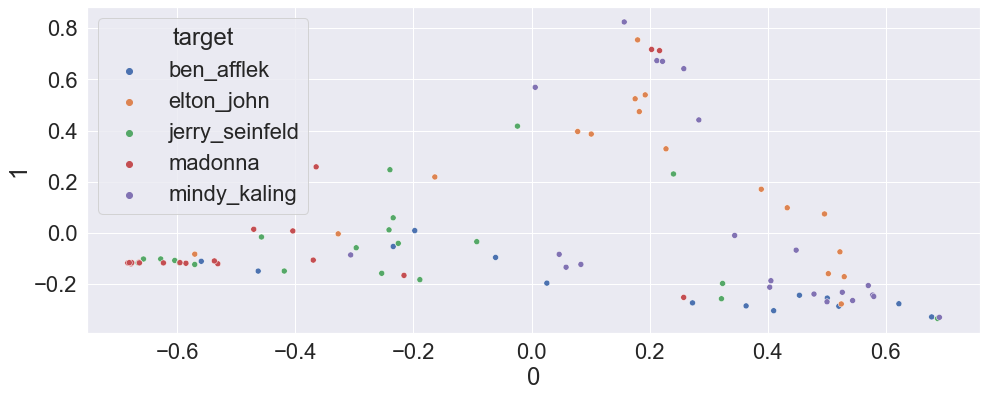

In [17]:
clust.train(base_model = 'vgg16CNNtl_dropout02.h5')